In [54]:
%pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import json

def create_df(file_path):
    with open(file_path, 'r') as f:
        global data
        data = json.load(f)
    records = []
    for entry in data['data']:
        timestamp = entry.get('timestamp')
        speed = entry.get('speed')
        accel = entry.get('accel')  # assuming 'accel' is a list of x, y, z components
        records.append({
        "timestamp": timestamp,
        "speed": speed,
        "accel_x": accel[0],  # Acceleration x-component
        "accel_y": accel[1],  # Acceleration y-component
        "accel_z": accel[2]   # Acceleration z-component
    })

# Create DataFrame
    df = pd.DataFrame(records)
    return df


df = create_df('../scripts/generated_data/brake_donkey-generated-roads-v0_iter_0.json')
df

,timestamp,speed,accel_x,accel_y,accel_z
0,1.728397e+09,4.594189e-06,-0.077222,0.037145,0.063056
1,1.728397e+09,7.815158e-02,-0.072221,-0.022861,2.062478
2,1.728397e+09,1.760966e-01,-0.036461,-0.044287,1.916459
3,1.728397e+09,2.729284e-01,-0.060539,0.037915,1.923575
4,1.728397e+09,3.690428e-01,0.029682,-0.137075,1.920258
...,...,...,...,...,...
145,1.728397e+09,2.781424e-07,-0.034734,-0.081394,-0.016989
146,1.728397e+09,2.176941e-07,-0.072504,0.040497,-0.083911
147,1.728397e+09,6.256419e-07,-0.000990,0.079944,-0.045989
148,1.728397e+09,3.366751e-07,-0.093143,0.020471,-0.056327


In [56]:
import matplotlib.pyplot as plt

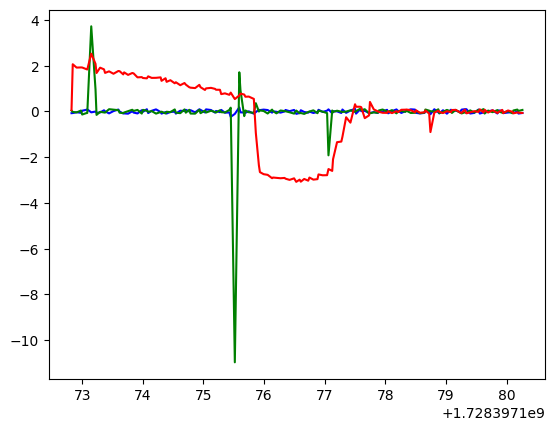

In [57]:
plt.plot(df['timestamp'],df['accel_x'], 'b')
plt.plot(df['timestamp'],df['accel_y'], 'g')
plt.plot(df['timestamp'],df['accel_z'], 'r')

In [58]:
import numpy as np
import math as m

theta, phi, psi = (0 + 2 * m.pi) * np.random.random_sample((3,)) - 2 * m.pi

def rotation_matrix_x(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta), -np.sin(theta)],
                     [0, np.sin(theta), np.cos(theta)]])

def rotation_matrix_y(phi):
    return np.array([[np.cos(phi), 0, np.sin(phi)],
                     [0, 1, 0],
                     [-np.sin(phi), 0, np.cos(phi)]])

def rotation_matrix_z(psi):
    return np.array([[np.cos(psi), -np.sin(psi), 0],
                     [np.sin(psi), np.cos(psi), 0],
                     [0, 0, 1]])

def rotate_data(df, theta, phi, psi):
    rotation_matrix = rotation_matrix_x(theta) @ rotation_matrix_y(phi) @ rotation_matrix_z(psi)
    df[['accel_x', 'accel_y', 'accel_z']] = df[['accel_x', 'accel_y', 'accel_z']].values @ rotation_matrix.T
    return df

In [ ]:
import numpy as np

def noising(df):
    df['accel_x'] = df['accel_x'].apply(lambda x: x + (0.2 + 0.2) * np.random.random_sample() - 0.2)
    df['accel_y'] = df['accel_y'].apply(lambda x: x + (.2 + .2) * np.random.random_sample() - .2 - 9.81)
    df['accel_z'] = df['accel_z'].apply(lambda x: x + (.2 + .2) * np.random.random_sample() - .2)
    # df = rotate_data(df, theta, phi, psi)
    return df

df_noised = noising(df)
df_noised



,timestamp,speed,accel_x,accel_y,accel_z
0,1.728397e+09,4.594189e-06,-0.161818,-9.686460,0.222035
1,1.728397e+09,7.815158e-02,0.052007,-9.741973,2.205148
2,1.728397e+09,1.760966e-01,-0.184388,-9.762044,2.070136
3,1.728397e+09,2.729284e-01,0.069816,-9.951923,2.045160
4,1.728397e+09,3.690428e-01,0.019413,-10.123169,2.061012
...,...,...,...,...,...
145,1.728397e+09,2.781424e-07,-0.171099,-9.728665,0.135276
146,1.728397e+09,2.176941e-07,0.017138,-9.902922,-0.119741
147,1.728397e+09,6.256419e-07,0.104860,-9.763027,-0.110121
148,1.728397e+09,3.366751e-07,0.025919,-9.661991,-0.040314


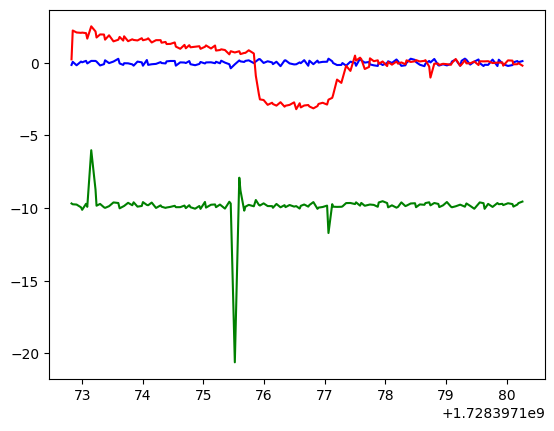

In [60]:
plt.plot(df_noised['timestamp'],df_noised['accel_x'], 'b')
plt.plot(df_noised['timestamp'],df_noised['accel_y'], 'g')
plt.plot(df_noised['timestamp'],df_noised['accel_z'], 'r')

In [66]:
df_rot = rotate_data(df_noised, theta, phi, psi)
df_rot


,timestamp,speed,accel_x,accel_y,accel_z
0,1.728397e+09,4.594189e-06,-7.283217,-4.604036,-4.434027
1,1.728397e+09,7.815158e-02,-6.141017,-6.174765,-4.891995
2,1.728397e+09,1.760966e-01,-6.309743,-6.157898,-4.678076
3,1.728397e+09,2.729284e-01,-6.384464,-6.132127,-4.986379
4,1.728397e+09,3.690428e-01,-6.522135,-6.240278,-5.024677
...,...,...,...,...,...
145,1.728397e+09,2.781424e-07,-7.367052,-4.555404,-4.435013
146,1.728397e+09,2.176941e-07,-7.580815,-4.358009,-4.649892
147,1.728397e+09,6.256419e-07,-7.440380,-4.271477,-4.662086
148,1.728397e+09,3.366751e-07,-7.350372,-4.311281,-4.554257


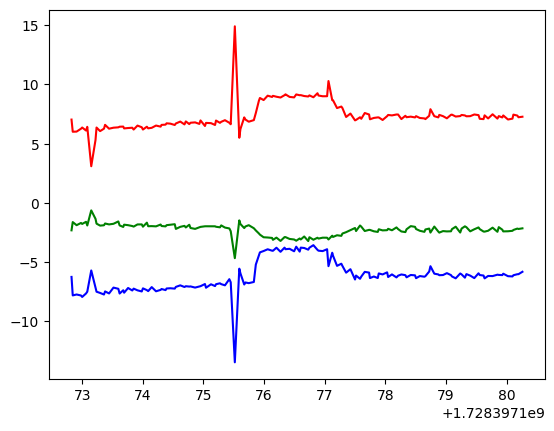

In [65]:
plt.plot(df_rot['timestamp'],df_rot['accel_x'], 'b')
plt.plot(df_rot['timestamp'],df_rot['accel_y'], 'g')
plt.plot(df_rot['timestamp'],df_rot['accel_z'], 'r')

In [ ]:
l = [{
    'timestamp': x[0],
    'accel_x': x[2],
    'accel_y': x[3],
    'accel_z': x[4],
} for x in df_rot.values]

obj = {
    'iscrash': data['iscrash'],
    'data': l
}

with open('test.json', "w") as f:
    json.dump(obj, f)